In [1]:
# root_path = "/Users/devasenan/Documents/conser-vision/data/"
root_path = "C:/Users/Karan/conser-vision/data/"
# root_path = "C:/Users/devas/Documents/projects/conser-vision/data/"

In [2]:
import pickle

with open(root_path+'pickles/train_images.pickle', 'rb') as train_imgs:
    train_images = pickle.load(train_imgs)
    train_imgs.close()

with open(root_path+'pickles/train_sites.pickle', 'rb') as train_st:
    train_sites = pickle.load(train_st)
    train_st.close()

with open(root_path+'pickles/train_labels.pickle', 'rb') as train_lbls:
    train_labels = pickle.load(train_lbls)
    train_lbls.close()

with open(root_path+'pickles/test_images.pickle', 'rb') as train_imgs:
    test_images = pickle.load(train_imgs)
    train_imgs.close()

with open(root_path+'pickles/test_sites.pickle', 'rb') as test_st:
    test_sites = pickle.load(test_st)
    test_st.close()

with open(root_path+'pickles/test_labels.pickle', 'rb') as test_lbls:
    test_labels = pickle.load(test_lbls)
    test_lbls.close()

Going through the data we have

In [3]:
# import matplotlib.pyplot as plt
import numpy as np

In [4]:
classes = ['antelope_duiker','bird','blank','civet_genet','hog','leopard','monkey_prosimian','rodent']

In [5]:
import pandas as pd
train_labels = pd.read_csv(root_path+'train_labels.csv').iloc[:, 1:]

In [6]:
train_labels

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
16483,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16484,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16485,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_y = np.array([np.argmax(train_labels.iloc[i]) for i in range(train_labels.shape[0])])

In [8]:
train_images.shape

(16488, 128, 128, 3)

In [9]:
train_y

array([1, 6, 1, ..., 3, 1, 3], dtype=int64)

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10, 10))
    plt.imshow(X[index])
    class_index = np.argmax(y.iloc[index, :])
    plt.xlabel(classes[class_index])


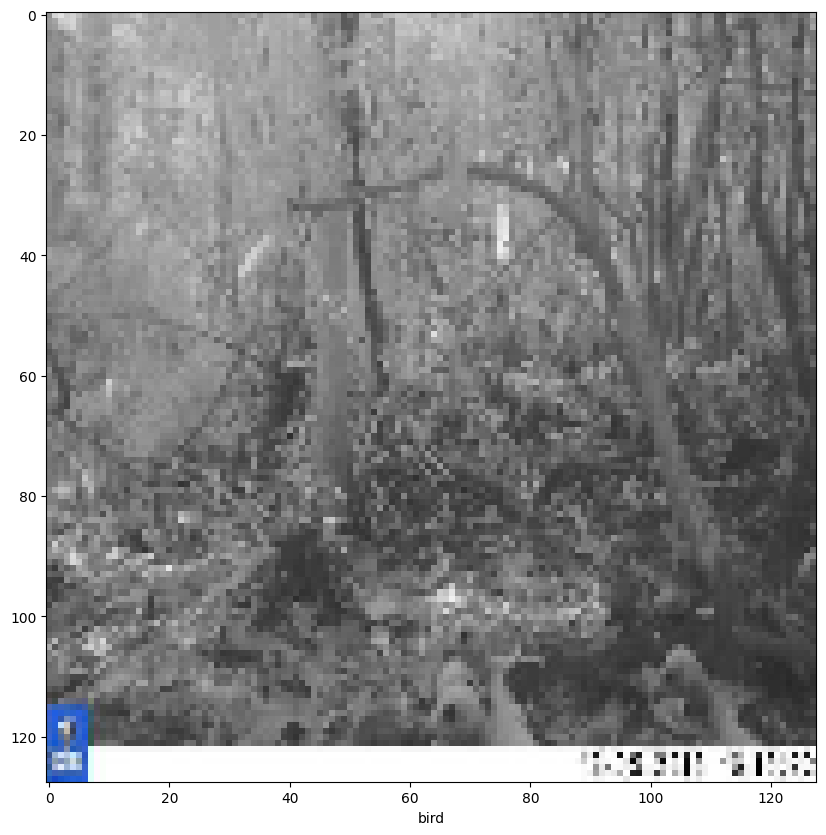

In [8]:
plot_sample(train_images, train_labels, 2)

In [10]:
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
import numpy as np

Model 0

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(128, 128, 3)),
    layers.Dense(5000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(train_images, train_labels, epochs=5)

In [42]:
ann.evaluate(test_images, test_labels)

140/140 [==============================] - 364s 3s/step - loss: 3.2279 - accuracy: 0.1243


[3.2279434204101562, 0.12432795763015747]

In [ ]:
y_pred = ann.predict(test_images)

Model 0.1

In [11]:
train_y

array([1, 6, 1, ..., 3, 1, 3], dtype=int64)

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='sigmoid')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(train_images, train_y, epochs=10)

Epoch 1/10
516/516 [==============================] - 26s 23ms/step - loss: 8.8799 - accuracy: 0.5169
Epoch 2/10
516/516 [==============================] - 12s 23ms/step - loss: 0.8270 - accuracy: 0.7280
Epoch 3/10
516/516 [==============================] - 12s 23ms/step - loss: 0.6030 - accuracy: 0.8043
Epoch 4/10
516/516 [==============================] - 12s 23ms/step - loss: 0.4752 - accuracy: 0.8444
Epoch 5/10
516/516 [==============================] - 12s 23ms/step - loss: 0.3944 - accuracy: 0.8735
Epoch 6/10
516/516 [==============================] - 12s 23ms/step - loss: 0.3382 - accuracy: 0.8884
Epoch 7/10
516/516 [==============================] - 12s 23ms/step - loss: 0.3100 - accuracy: 0.8973
Epoch 8/10
516/516 [==============================] - 12s 23ms/step - loss: 0.2859 - accuracy: 0.9082
Epoch 9/10
516/516 [==============================] - 12s 23ms/step - loss: 0.2610 - accuracy: 0.9171
Epoch 10/10
516/516 [==============================] - 12s 23ms/step - loss: 0.239

In [14]:
cnn.save('cnn1_model1.h5')

In [34]:
import pickle as pk
with open('cnn1_model.h5', 'wb') as model:
    pk.dump(cnn, model)
    model.close()

INFO:tensorflow:Assets written to: ram://018b3676-69be-4d37-947e-17f2a3f3e56a/assets


INFO:tensorflow:Assets written to: ram://018b3676-69be-4d37-947e-17f2a3f3e56a/assets


In [11]:
import pickle as pk
cnn = None
model_path = '/Users/devasenan/Documents/conser-vision/models-tried/cnn1_model.sav'
with open(model_path, 'rb') as model_sav:
    cnn = pk.load(model_sav)
    model_sav.close()

2022-11-30 18:52:49.204278: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
y_pred = cnn.predict(img)

1/1 [==============================] - 0s 349ms/step


In [23]:
y_pred

array([[1.00000e+00, 0.00000e+00, 1.00000e+00, 4.73336e-20, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00]], dtype=float32)

In [23]:
y_pred_labels = np.array([np.argmax(y_pred[i])
                         for i in range(y_pred.shape[0])])


In [24]:
y_pred_labels

array([5])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_pred_labels)

0.12365591397849462

Model 0.2

In [15]:
cnn2=Sequential()
cnn2.add(Conv2D(60,(3,3),input_shape=(128,128,3)))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))

cnn2.add(Conv2D(60,(3,3)))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))

cnn2.add(Flatten())
cnn2.add(Dense(100,activation='relu',activity_regularizer=l1(0.001)))
cnn2.add(Dense(8))
cnn2.add(Activation('softmax'))

cnn2.compile(loss='binary_crossentropy',optimizer='Adam' ,metrics=['accuracy'])

cnn2.fit(train_images, train_labels, epochs=100, verbose=1, shuffle=True)

2022-11-25 11:19:58.140524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
516/516 [==============================] - 383s 732ms/step - loss: 0.2917 - accuracy: 0.5205
Epoch 2/100
516/516 [==============================] - 378s 733ms/step - loss: 0.1856 - accuracy: 0.7462
Epoch 3/100
516/516 [==============================] - 436s 844ms/step - loss: 0.1418 - accuracy: 0.8238
Epoch 4/100
516/516 [==============================] - 373s 722ms/step - loss: 0.1166 - accuracy: 0.8646
Epoch 5/100
516/516 [==============================] - 364s 706ms/step - loss: 0.1007 - accuracy: 0.8896
Epoch 6/100
516/516 [==============================] - 368s 713ms/step - loss: 0.0872 - accuracy: 0.9051
Epoch 7/100
516/516 [==============================] - 356s 689ms/step - loss: 0.0774 - accuracy: 0.9213
Epoch 8/100
516/516 [==============================] - 359s 695ms/step - loss: 0.0688 - accuracy: 0.9319
Epoch 9/100
516/516 [==============================] - 356s 691ms/step - loss: 0.0637 - accuracy: 0.9395
Epoch 10/100
516/516 [==============================] -

In [19]:
test_labels

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,0.048233,0.189185,0.044914,0.199588,0.106118,0.132915,0.166410,0.112637
1,0.097078,0.061400,0.026409,0.241530,0.144344,0.051780,0.287811,0.089648
2,0.124658,0.089101,0.189225,0.174494,0.180540,0.079995,0.085672,0.076314
3,0.109966,0.048397,0.055598,0.323600,0.322356,0.063252,0.008160,0.068671
4,0.165742,0.184610,0.005431,0.136806,0.000389,0.122078,0.151521,0.233423
...,...,...,...,...,...,...,...,...
4459,0.143675,0.185103,0.109074,0.158833,0.083497,0.010513,0.155293,0.154011
4460,0.068913,0.150572,0.197232,0.124579,0.131486,0.152534,0.039096,0.135588
4461,0.098239,0.149066,0.168635,0.086321,0.136863,0.077155,0.121480,0.162241
4462,0.036345,0.115411,0.302392,0.072757,0.105491,0.183422,0.106307,0.077875


In [20]:
y_test_labels = np.array([np.argmax(test_labels[i, :])
                         for i in range(test_labels.shape[0])])
y_test_labels


InvalidIndexError: (0, slice(None, None, None))

Model 1

In [22]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D((2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [23]:
opt1 = keras.optimizers.SGD(learning_rate=0.001)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
model1.fit(train_images, train_y, epochs=5, batch_size=64)

Epoch 1/5
258/258 [==============================] - 73s 273ms/step - loss: nan - accuracy: 0.1474
Epoch 2/5
258/258 [==============================] - 68s 263ms/step - loss: nan - accuracy: 0.1500
Epoch 3/5
258/258 [==============================] - 64s 247ms/step - loss: nan - accuracy: 0.1500
Epoch 4/5
258/258 [==============================] - 68s 262ms/step - loss: nan - accuracy: 0.1500
Epoch 5/5
258/258 [==============================] - 63s 245ms/step - loss: nan - accuracy: 0.1500


In [17]:
model1.evaluate(test_images, test_y)

140/140 [==============================] - 6s 38ms/step - loss: nan - accuracy: 0.1147


[nan, 0.11469534039497375]

Model 2

In [29]:
model2 = Sequential()

model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128, 128, 3)))
model2.add(MaxPooling2D())

model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Conv2D(16, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


In [30]:
opt2 = keras.optimizers.Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=opt2, metrics=['accuracy'])

In [31]:
model2.fit(train_images, train_y, epochs=5, batch_size=64)

Epoch 1/5
258/258 [==============================] - 77s 285ms/step - loss: -99740482011136.0000 - accuracy: 0.0996
Epoch 2/5
258/258 [==============================] - 79s 306ms/step - loss: -13150134372139008.0000 - accuracy: 0.0995
Epoch 3/5
258/258 [==============================] - 62s 240ms/step - loss: -167500666527285248.0000 - accuracy: 0.0995
Epoch 4/5
258/258 [==============================] - 79s 305ms/step - loss: -871972163173744640.0000 - accuracy: 0.0995
Epoch 5/5
258/258 [==============================] - 72s 278ms/step - loss: -2883836205848330240.0000 - accuracy: 0.0995
